# Visualizations with the Full Data Set

## List of Contents

Hour of day histogram
Loyalty flag bar chart
Line chart using a 70/30 sample to compare hour of day and product prices
Line chart using the sample to compare customer age and number of dependents
Scatterplot exploring age and income

#01.Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

#02.Import Data

In [2]:
#create path
path = r'/Users/juliewhitton/Desktop/Instacart Basket Analysis/'

In [3]:
#import data
full_data_set = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_data_set.pkl'))

In [4]:
#check import
full_data_set.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,...,freq_flag,first_name,last_name,gender,state,age,date_joined,number_dependents,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
full_data_set.shape

(32404859, 33)

#03.Histogram

Create a histogram of the “order_hour_of_day” column.

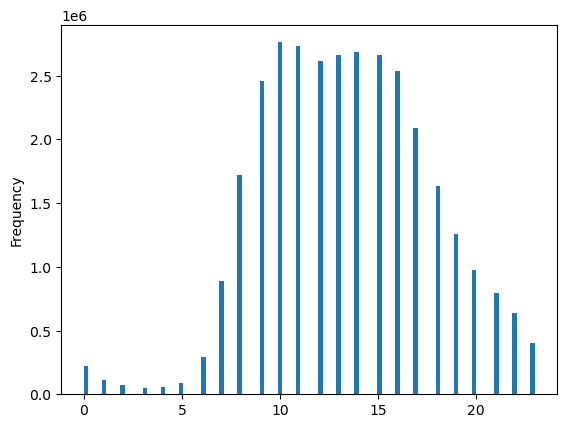

In [6]:
#create hist for 'time_of_order'
hist_time_of_order = full_data_set['time_of_order'].plot.hist(bins = 100)

In a markdown cell beneath your histogram, describe what the histogram demonstrates.

The histogram demonstrates that the hours between midnight and 6 am are the least busy and, generally, the hours between 9 am and 5 pm are the busiest. 

#04.Bar Chart 

In [7]:
df_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_subset.pkl'))

In [8]:
df_cust['loyalty_flag'].value_counts()

New customer        112328
Regular customer     76864
Loyal customer       17017
Name: loyalty_flag, dtype: int64

Text(0.5, 1.0, 'Loyalty Distribution')

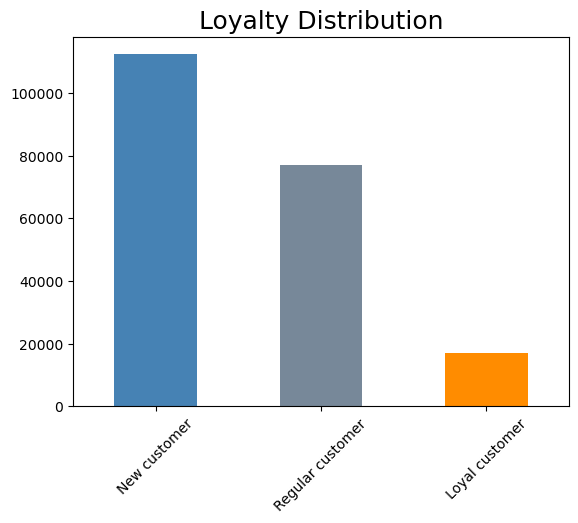

In [9]:
#create a bar chart using 'loyalty_flag'

bar_customer_loyalty = df_cust.loyalty_flag.value_counts().plot(kind='bar', color = ['steelblue', 'lightslategray', 
                                                                                     'darkorange']) 
                                                                                      

plt.xticks(rotation = 45)
plt.title('Loyalty Distribution', fontsize = 18) 


#05.Line Chart Using a Sample

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [10]:
#set the seed for a 70/30 sampling set
np.random.seed(8)
dev = np.random.rand(len(full_data_set)) <= 0.7

In [11]:
#test dev
dev

array([False, False, False, ...,  True,  True,  True])

In [12]:
#assign samples variables
large = full_data_set[dev]

In [13]:
smaller = full_data_set[~dev]

In [14]:
#test total rows
len(full_data_set)

32404859

In [15]:
len(large) + len(smaller)

32404859

In [16]:
#reduce sample to include only necessary columns
df_smaller = smaller[['time_of_order', 'prices']]

In [17]:
#check reduction
df_smaller.head()

,time_of_order,prices
0,8,9.0
1,7,9.0
2,12,9.0
12,7,4.4
13,12,4.4


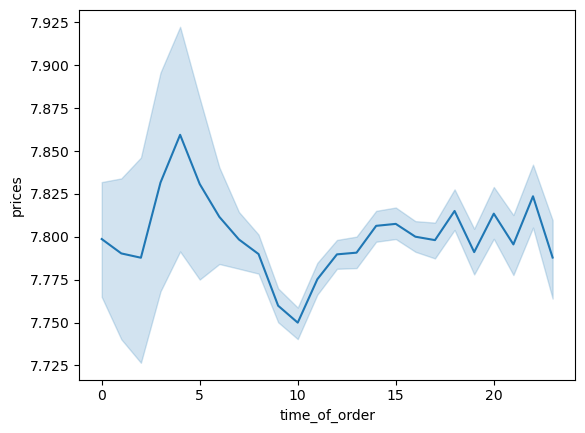

In [18]:
#create line chart
line_time_of_order = sns.lineplot(data = df_smaller, x = 'time_of_order', y = 'prices')

Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [19]:
#reduce sample to necessary columns
df_smaller_2 = smaller[['age', 'number_dependents']]

In [20]:
#check sample
df_smaller_2.head()

,age,number_dependents
0,31,3
1,31,3
2,31,3
12,31,3
13,31,3


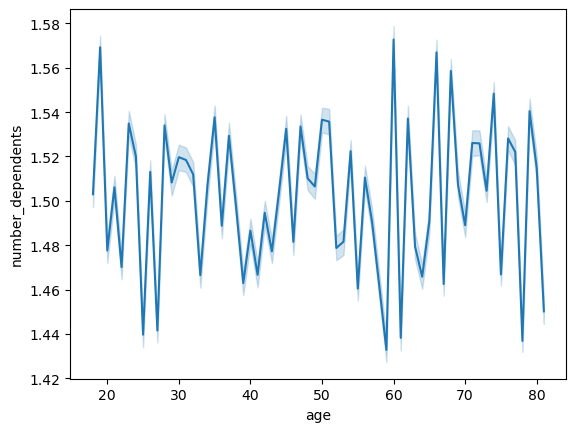

In [21]:
#create line chart
line_age_dependents = sns.lineplot(data = df_smaller_2, x = 'age', y = 'number_dependents')

In a markdown cell beneath your line chart, describe what the line chart shows.


The line chart does not tell us much. All ages have, on average, between 1.44 and 1.58 dependents. That tells me that, on average, over the entire customer base there is not a large or meaningful correlation between age and number of dependents.

#06.Scatterplot

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [22]:
#name sample
df_smaller_3 = smaller[['age', 'income']]

In [23]:
#check df_smaller_3
df_smaller_3.head()

,age,income
0,31,40423
1,31,40423
2,31,40423
12,31,40423
13,31,40423


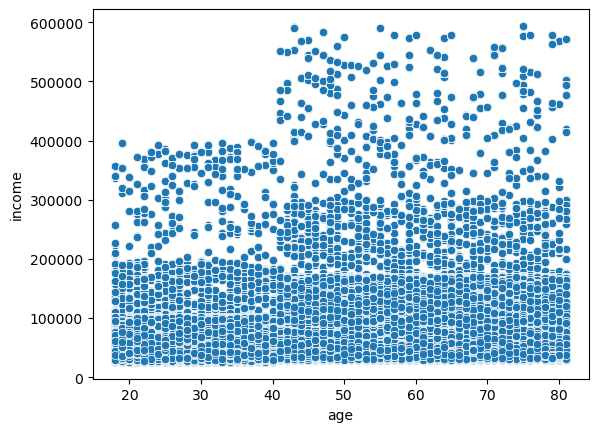

In [24]:
#create scatterplot
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_smaller_3)

In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

The scatterplot shows that across all ages, the majority of customers earn below $200,000/year. Customers earning between $200-300k/year tend to mostly be over the age of 40. There are NO customers under the age of 40 that make more than $400k/year and the density among other groups is much less above $300k/year. 

#07.Export Visualizations

In [25]:
#export histogram
hist_time_of_order.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_time_of_order.png'))

In [26]:
#export barchart
bar_customer_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_loyalty.png'), 
                                    bbox_inches = 'tight')

In [27]:
#export line charts
line_time_of_order.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_time_of_order.png'))

In [28]:
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents.png'))

In [29]:
#export scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))

In [30]:
#export df
full_data_set.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data_set.pkl'))